In [3]:
import numpy as np
import pandas as pd
import sklearn
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

In [4]:
def dist(pt1,pt2):
    sum=0
    for x in range(0,len(pt1)):
        sum+=(pt1[x]-pt2[x])**2
    return math.sqrt(sum)

def heapify(pt,arr,x,s):
    l=2*x
    r=2*x+1
    smallest=x
    if l<=s and dist(pt,arr[l-1])<dist(pt,arr[smallest-1]):
        smallest=l
    if r<=s and dist(pt,arr[r-1])<dist(pt,arr[smallest-1]):
        smallest=r
    if smallest!=x:
        t=np.array(arr[x-1])
        arr[x-1]=arr[smallest-1]
        arr[smallest-1]=t
        #arr[x-1],arr[smallest-1] = arr[smallest-1],arr[x-1]
        heapify(pt,arr,smallest,s)

def disp(arr):
    for x in range(0,len(arr)):
        print(arr[x])

def knn(pt,a,k):
    c=0
    arr=np.array(a)
    temp=np.array([np.zeros(len(arr[0]))])
    for x in range(len(arr)-1,-1,-1):
        heapify(pt,arr,x+1,len(arr))
    for x in range(len(arr)-1,-1,-1):
        t=np.array(arr[0])
        arr[0]=arr[x]
        arr[x]=t
        #arr[0],arr[x]=arr[x],arr[0]
        if c<=k:
            temp=np.concatenate((temp,[arr[x]]))
            c+=1
            heapify(pt,arr,1,x)
        elif c>k:
            break
    return temp[2:,:]

def synthetic(pt,neighbours,n,k):
    newpts=np.array([np.zeros(len(pt))])
    for y in range(1,n+1):
        rand=random.randint(1,k)
        randpt=neighbours[rand-1]
        newpt=np.array([])
        gap=random.random()
        for x in range(0,len(pt)):
            diff=randpt[x]-pt[x]
            new=pt[x]+gap*diff
            newpt=np.append(newpt,[new])
        newpts=np.concatenate((newpts,[newpt]))
    return newpts[1:,:]

def smote(minarr,n,k):
    random.seed(42)
    num=int(n/100)
    synth=np.array([np.zeros(len(minarr[0]))])
    for x in range(0,len(minarr)):
        neighbours=knn(minarr[x],minarr,k)
        #print(neighbours)
        synth=np.concatenate((synth,synthetic(minarr[x],neighbours,num,k)))
    return synth[1:,:]

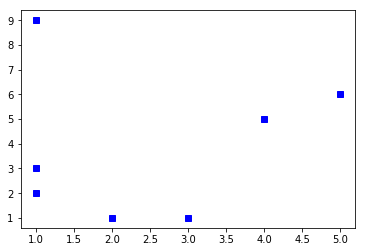

In [3]:
points=np.array([[1,2],[2,1],[1,3],[3,1],[4,5],[5,6],[1,9]])
plt.plot(points[:,0],points[:,1],'bs')

In [4]:
#a=knn([1,2],points,3)
#smote(points,200,3)

In [5]:
#print(a)

In [6]:
#synthetic([1,2],a,1,3)

In [4]:
syn=smote(points,3000,4)
new=np.concatenate((points,syn))
len(syn)

210

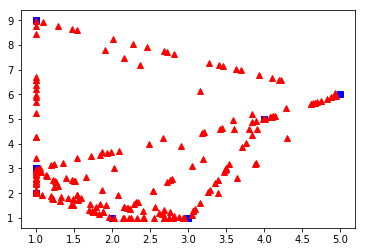

In [5]:
plt.plot(points[:,0],points[:,1],'bs',syn[:,0],syn[:,1],'r^')

In [6]:
data=pd.read_csv("F:\\Epilepsy Data.csv")
data.drop('Unnamed: 0',axis=1,inplace=True)
data['y'][data['y']!=1]=0
cat=data['y']
cat=cat.as_matrix()
features=data.drop('y',axis=1)
features=features.as_matrix()
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [28]:
xfinal=pd.read_csv("F:\\SMOTExfinal.csv",header=None)
yfinal=pd.read_csv("F:\\SMOTEyfinal.csv",header=None)

In [32]:
pd.value_counts(yfinal[0].values, sort=False)

0.0    9200
1.0    4600
dtype: int64

In [33]:
xfinal=xfinal.values
yfinal=yfinal.values

In [34]:
yfinal

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 1.],
       [ 1.],
       [ 1.]])

In [86]:
'''test=data[:][data['y']==1]
test.drop('y',axis=1,inplace=True)'''

"test=data[:][data['y']==1]\ntest.drop('y',axis=1,inplace=True)"

In [143]:
#testarr=test.values

In [144]:
#syn2=smote(testarr,100,3)

In [89]:
#syn2

In [168]:
#newarr=np.concatenate((testarr,syn2))

In [169]:
'''test2=data[:][data['y']==0]
test2.drop('y',axis=1,inplace=True)'''

"test2=data[:][data['y']==0]\ntest2.drop('y',axis=1,inplace=True)"

In [170]:
'''test2arr=test2.values
test2arr'''

'test2arr=test2.values\ntest2arr'

In [171]:
#xfinal=np.concatenate((test2arr,newarr))

In [172]:
#xfinal

In [173]:
'''y1=np.ones(len(newarr))
y2=np.zeros(len(test2arr))'''

'y1=np.ones(len(newarr))\ny2=np.zeros(len(test2arr))'

In [174]:
#yfinal=np.concatenate((y2,y1))

In [8]:
yfinal

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 1.],
       [ 1.],
       [ 1.]])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( xfinal, yfinal, test_size=0.3, random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski' , p=2)
classifier.fit(X_train,y_train)

f:\python35\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
classifier.score(X_test,y_test)

0.96545893719806763

In [13]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.95      1.00      0.97      2753
        1.0       0.99      0.91      0.95      1387

avg / total       0.97      0.97      0.97      4140



In [14]:
xplotly=[]
yplotly=[]
zplotly=[]
cplotly=[]
xplotly2=[]
yplotly2=[]
zplotly2=[]
cplotly2=[]

for z in range(11450,11550):
    if yfinal[z][0]==1:
        for y in range(178):
            xplotly.append(z)
            zplotly.append(xfinal[z][y])
            yplotly.append(y+10)
            cplotly.append((0,1,0,1))
    else:
        for y in range(178):
            xplotly2.append(z)
            zplotly2.append(xfinal[z][y])
            yplotly2.append(y+10)
            cplotly2.append((1,0,0,1))


In [15]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x=xplotly,
    y=yplotly,
    z=zplotly,
    mode='lines',
    marker=dict(
        size=3,
        color=cplotly,                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

trace2 = go.Scatter3d(
    x=xplotly2,
    y=yplotly2,
    z=zplotly2,
    mode='lines',
    marker=dict(
        size=3,
        color=cplotly2,                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)


data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
     xaxis=dict(
        autotick=False,
        tick0=0,
        dtick=1,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

In [295]:
#np.savetxt("SMOTExfinal.csv", xfinal, delimiter=",")
#np.savetxt("SMOTEyfinal.csv", yfinal, delimiter=",")

In [14]:
from sklearn.neural_network import MLPClassifier

In [15]:
model = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, batch_size=4,random_state=101)

In [16]:
model.fit(X_train,y_train)

f:\python35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size=4, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=101,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [17]:
y_pred=model.predict(X_test)

In [18]:
model.score(X_test,y_test)

0.97294685990338159

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98      2753
        1.0       0.96      0.96      0.96      1387

avg / total       0.97      0.97      0.97      4140



In [20]:
from sklearn import svm
classifier2 = svm.SVC(C=0.1,gamma=1,decision_function_shape='ovr')
classifier2.fit(X_train,y_train)

f:\python35\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
y_pred=classifier2.predict(X_test)

In [23]:
classifier2.score(X_test,y_test)

0.66497584541062804

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.66      1.00      0.80      2753
        1.0       0.00      0.00      0.00      1387

avg / total       0.44      0.66      0.53      4140



f:\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
